# Initial Imports

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly as plotly
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [13]:
ls

cementStrength.ipynb*  Concrete_Data.xls*  Concrete_Readme.txt*  SelfEDA.ipynb*


In [14]:
pwd

'/media/himanshu/Ubuntu/iNeuron/Projects/ML Projects/CementPrediction/EDA'

In [15]:
## Reading Data

data = pd.read_excel("Concrete_Data.xls")

In [16]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


# 1) Profiling of dataset

In [88]:
### Dependent Feature

dep_features = data['Concrete compressive strength(MPa, megapascals) ']

In [89]:
independent_features = data.drop(columns=['Concrete compressive strength(MPa, megapascals) '], axis = 1)

In [90]:
independent_features.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


## Missing data

In [17]:
## Describing the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

- We can see that there are 9 columns in total, where columns (0-7) are independent columns and column 8 is Dependent Column
- All the columns do not contain any Null Value
- All are numerical columns where column Age is having integer data rest are float in nature.
- There are no missing values in any of the features

## Numerical Cols

In [23]:
num_cols = [cols for cols in data.columns if data[cols].dtype != np.object]

In [25]:
num_cols,len(num_cols)

(['Cement (component 1)(kg in a m^3 mixture)',
  'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
  'Fly Ash (component 3)(kg in a m^3 mixture)',
  'Water  (component 4)(kg in a m^3 mixture)',
  'Superplasticizer (component 5)(kg in a m^3 mixture)',
  'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
  'Fine Aggregate (component 7)(kg in a m^3 mixture)',
  'Age (day)',
  'Concrete compressive strength(MPa, megapascals) '],
 9)

### Discrete numerical features

In [26]:
dis_num_cols = [cols for cols in num_cols if data[cols].dtype == np.int]

In [27]:
dis_num_cols, len(dis_num_cols)

(['Age (day)'], 1)

### Continuous numerical features

In [29]:
cont_num_cols = [cols for cols in num_cols if data[cols].dtype == np.float]

In [30]:
cont_num_cols, len(cont_num_cols)

(['Cement (component 1)(kg in a m^3 mixture)',
  'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
  'Fly Ash (component 3)(kg in a m^3 mixture)',
  'Water  (component 4)(kg in a m^3 mixture)',
  'Superplasticizer (component 5)(kg in a m^3 mixture)',
  'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
  'Fine Aggregate (component 7)(kg in a m^3 mixture)',
  'Concrete compressive strength(MPa, megapascals) '],
 8)

# 2) Statistical based analysis

### Central Tendancy (mean,media, mode) 

In [31]:
from statistics import mode

In [32]:
def mean_median_mode(dataset, num_cols):
    mean, median, c_mode = [], [], []
    for cols in (num_cols):
        mean.append(np.mean(dataset[cols]))
        median.append(np.median(dataset[cols]))
        c_mode.append(mode(dataset[cols]))

    return mean, median, c_mode

In [33]:
mean, median, c_mode = mean_median_mode(dataset= data, num_cols= num_cols)

In [39]:
## Adding num_cols name and creating a dataframe for mean, median and mode

stat_df = pd.concat([pd.Series(num_cols, name='features'), pd.Series(mean, name = 'mean'), pd.Series(median, name ='median'), pd.Series(c_mode, name = 'mode')], axis = 1)

In [41]:
stat_df

,features,mean,median,mode
0,Cement (component 1)(kg in a m^3 mixture),281.165631,272.900000,425.000000
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,73.895485,22.000000,0.000000
2,Fly Ash (component 3)(kg in a m^3 mixture),54.187136,0.000000,0.000000
3,Water (component 4)(kg in a m^3 mixture),181.566359,185.000000,192.000000
4,Superplasticizer (component 5)(kg in a m^3 mix...,6.203112,6.350000,0.000000
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,972.918592,968.000000,932.000000
6,Fine Aggregate (component 7)(kg in a m^3 mixture),773.578883,779.510000,594.000000
7,Age (day),45.662136,28.000000,28.000000
8,"Concrete compressive strength(MPa, megapascals)",35.817836,34.442774,33.398217


### Dispersion (Variance -> Deviation -> IQR)

Variance = Sq.of Deviation

Here we are using Sampled data so will use sample Varaince and sample Standard Deviation

Variance - helps in distinguish b/w a set of available data from each other, if the central tendancy is similar or same, by taking in account the Dispersion/Spread of Data found using Standard Deviation..R

In [44]:
import statistics as stat

In [45]:
def var_std(dataset, num_cols):
    var, std = [],[]
    for col in num_cols:
        temp = stat.variance(dataset[col], xbar= None)
        var.append(temp)
        std.append(np.sqrt(temp))

    return var, std

In [46]:
var, std = var_std(dataset= data, num_cols= num_cols)

In [49]:
### adding the values to previuosly made stat_df

stat_df = pd.concat([stat_df, pd.Series(var, name = 'variance'), pd.Series(std, name = 'deviation')], axis = 1)

In [50]:
stat_df

,features,mean,median,mode,variance,deviation
0,Cement (component 1)(kg in a m^3 mixture),281.165631,272.900000,425.000000,10921.742654,104.507142
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,73.895485,22.000000,0.000000,7444.083725,86.279104
2,Fly Ash (component 3)(kg in a m^3 mixture),54.187136,0.000000,0.000000,4095.548093,63.996469
3,Water (component 4)(kg in a m^3 mixture),181.566359,185.000000,192.000000,456.060245,21.355567
4,Superplasticizer (component 5)(kg in a m^3 mix...,6.203112,6.350000,0.000000,35.682602,5.973492
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,972.918592,968.000000,932.000000,6045.656228,77.753818
6,Fine Aggregate (component 7)(kg in a m^3 mixture),773.578883,779.510000,594.000000,6428.099159,80.175427
7,Age (day),45.662136,28.000000,28.000000,3990.437729,63.169912
8,"Concrete compressive strength(MPa, megapascals)",35.817836,34.442774,33.398217,279.079717,16.705679


### Quantiles

In [69]:
def quantiles(dataset, num_cols):
    mini, twenty_five_tile, fifty_tile, seventy_five_tile ,maxi =[], [], [], [] ,[]
    for col in num_cols:
       mi = np.min(dataset[col])
       t1, t2, t3 = stat.quantiles(dataset[col], n = 4)
       mx = np.max(dataset[col])
       mini.append(mi), twenty_five_tile.append(t1), fifty_tile.append(t2), seventy_five_tile.append(t3), maxi.append(mx)
    return mini, twenty_five_tile, fifty_tile, seventy_five_tile, maxi
        

In [70]:
min, twenty_five_tile, fifty_tile, seventy_five_tile, max = quantiles(dataset= data, num_cols=num_cols)

In [71]:
min

[102.0, 0.0, 0.0, 121.75, 0.0, 801.0, 594.0, 1, 2.331807832]

In [73]:
### adding tit o previously made stat_df

stat_df = pd.concat([stat_df, pd.Series(min, name= 'min'), pd.Series(twenty_five_tile, name= '25 %tile'), pd.Series(fifty_tile, name='50 %tile'), pd.Series(seventy_five_tile, name= '75 %tile'), pd.Series(max, name= 'max')], axis = 1)

In [74]:
stat_df

,features,mean,median,mode,variance,deviation,min,25 %tile,50 %tile,75 %tile,max
0,Cement (component 1)(kg in a m^3 mixture),281.165631,272.900000,425.000000,10921.742654,104.507142,102.000000,192.000000,272.900000,350.000000,540.000000
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,73.895485,22.000000,0.000000,7444.083725,86.279104,0.000000,0.000000,22.000000,143.000000,359.400000
2,Fly Ash (component 3)(kg in a m^3 mixture),54.187136,0.000000,0.000000,4095.548093,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
3,Water (component 4)(kg in a m^3 mixture),181.566359,185.000000,192.000000,456.060245,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
4,Superplasticizer (component 5)(kg in a m^3 mix...,6.203112,6.350000,0.000000,35.682602,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,972.918592,968.000000,932.000000,6045.656228,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
6,Fine Aggregate (component 7)(kg in a m^3 mixture),773.578883,779.510000,594.000000,6428.099159,80.175427,594.000000,730.300000,779.510000,824.250000,992.600000
7,Age (day),45.662136,28.000000,28.000000,3990.437729,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
8,"Concrete compressive strength(MPa, megapascals)",35.817836,34.442774,33.398217,279.079717,16.705679,2.331808,23.695049,34.442774,46.208682,82.599225


In [75]:
data.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

 - No null values present

## Distribution of Data

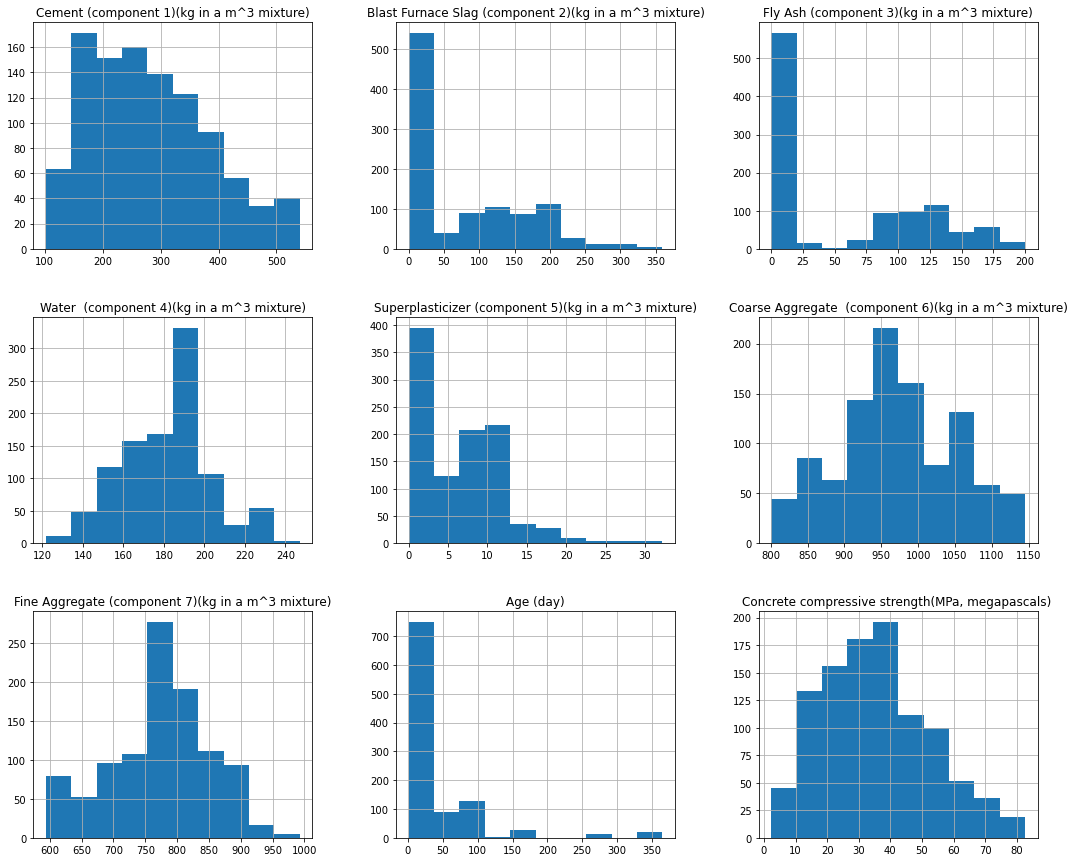

In [77]:
## Histrogram

data.hist(figsize = (18,15))
plt.show()

- We can see through histograms that data contains irregular distribution
- Will make dist_plot for more info

/home/himanshu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/himanshu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/himanshu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

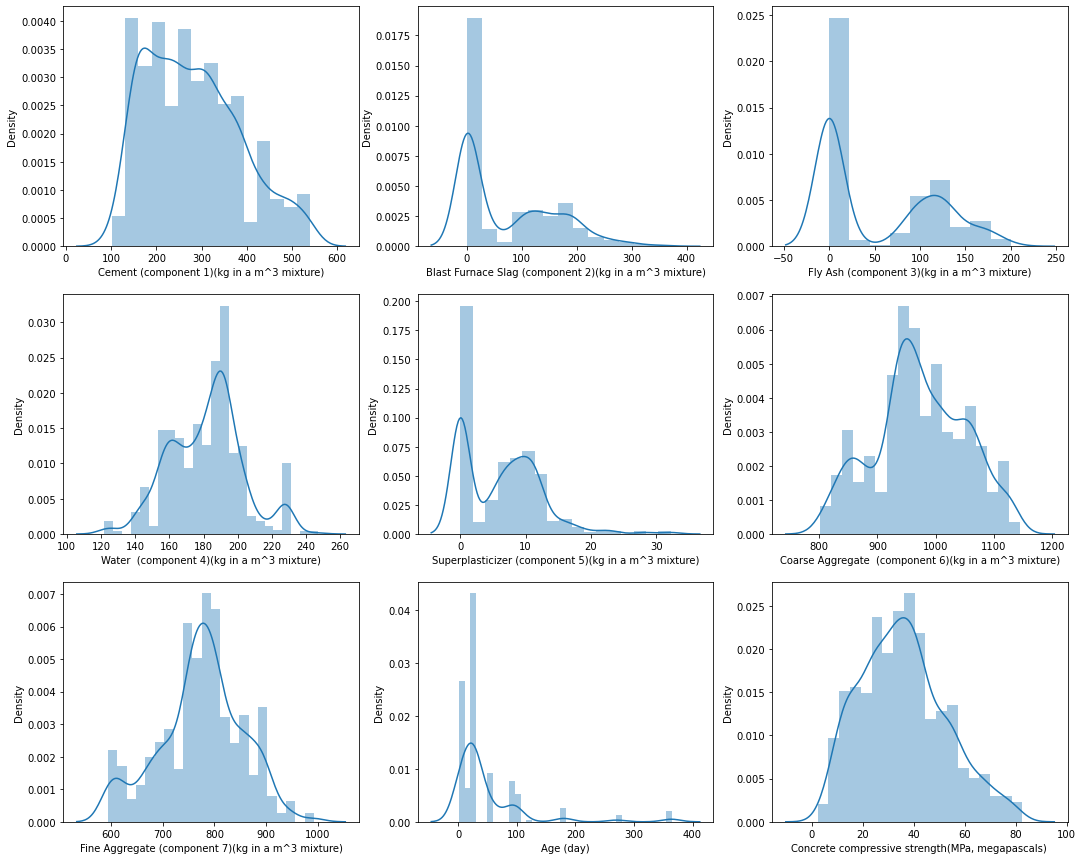

In [80]:
fig, ax = plt.subplots(ncols= 3, nrows= 3, figsize = (18,15))

ax = ax.ravel()

for i, col in enumerate(num_cols):
    sns.distplot(data[col], ax = ax[i], label= col)
    

- By seeing the distplot we can see that most of the features do not follow a Bell curve/ Gaussian or Normal Distribution.
- Will convert it to Bell curve by some extent by taking log of each faeture.

#### Experiment : Data Transformation - Non Gaussian Data -> Log Normal Data

- While taking log, it might give infinty for values 0, so will add a constant value = 1 to each value in independent features to avoid that curcumstance

In [93]:
## copying independet features to a new variable

independent_features_copy = independent_features.copy()

In [94]:
independent_features_copy

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [95]:
for cols in independent_features.columns:
    independent_features_copy[cols] += 1  # adding 1 to each value
    independent_features_copy[cols] = np.log(independent_features_copy[cols])   # taking log of feature

In [96]:
independent_features_copy.head(5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,6.293419,0.000000,0.0,5.093750,1.252763,6.947937,6.517671,3.367296
1,6.293419,0.000000,0.0,5.093750,1.252763,6.962243,6.517671,3.367296
2,5.809643,4.966335,0.0,5.433722,0.000000,6.838405,6.388561,5.602119
3,5.809643,4.966335,0.0,5.433722,0.000000,6.838405,6.388561,5.902633
4,5.296315,4.893352,0.0,5.262690,0.000000,6.886940,6.717200,5.888878


/home/himanshu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/himanshu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/himanshu/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

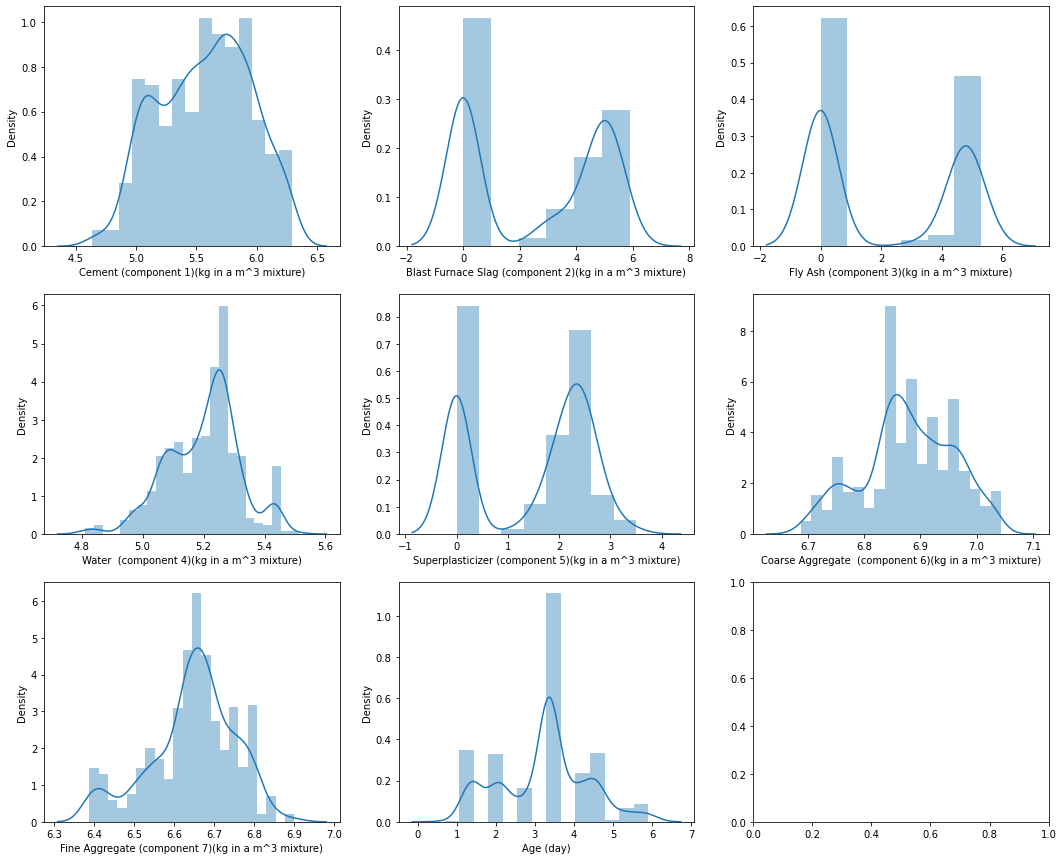

In [97]:
### Creating dist plot to see if any change is there.

fig, ax = plt.subplots(nrows=3, ncols=3, figsize = (18,15))
ax= ax.ravel()
for i,col in enumerate(independent_features_copy.columns):
    sns.distplot(independent_features_copy[col], ax = ax[i], label= col)

- We can see changes are present so, will do the same thing in our production data.
- Moving forward with our EDA will use this above transformed data

# 3) Visualization

#### Univariate Analysis

- It deals with analysis of single feature at a time like(histogram) - already made above and barplots for categorical fetures

#### Bi-Variate Analysis

- It deals with 2 features at a time

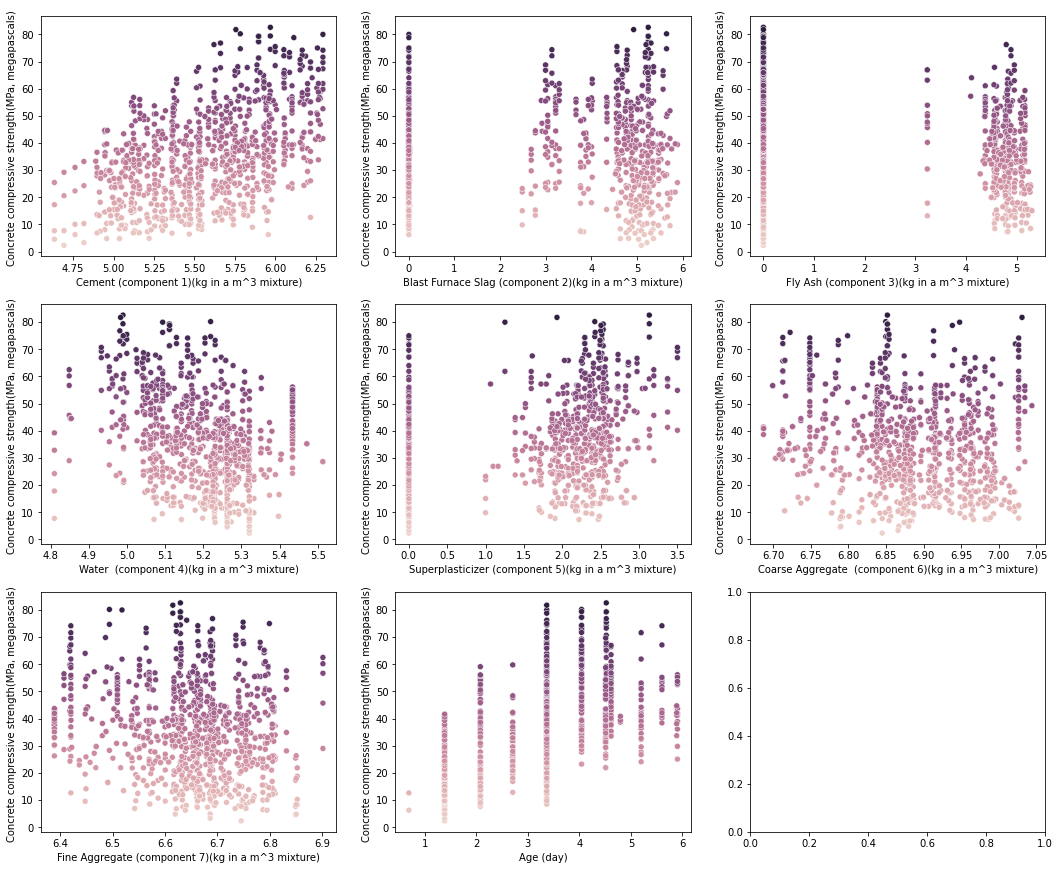

In [116]:
 ## Scatter Plot:

 fig, ax = plt.subplots(nrows= 3, ncols= 3, figsize= (18,15))
 ax= ax.ravel()
 for i, cols in enumerate(independent_features_copy.columns):
     sns.scatterplot(x = independent_features_copy[cols], y = dep_features, ax = ax[i], hue=dep_features, legend= False)
     

- Seeing the Scatter Plot it is for sure that the features are not having linear relation with Dependent Feature.

### Inter Correlation plot for independent fetures

In [121]:
# Correlation values

corr = independent_features_copy.corr()

<AxesSubplot:>

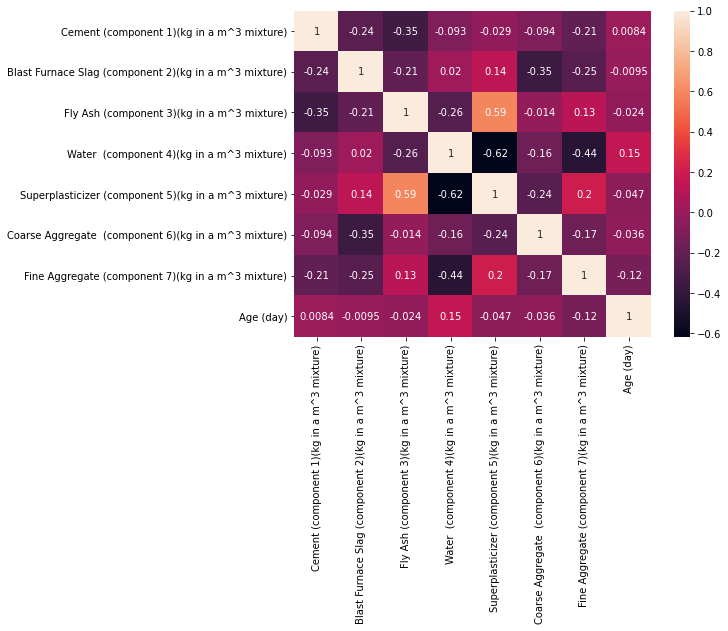

In [124]:
## Plotting heatmap

plt.figure(figsize = (8,6))
sns.heatmap(corr, annot= True)

- From the heat map we can infer that the InterCorrelation is mininmal.

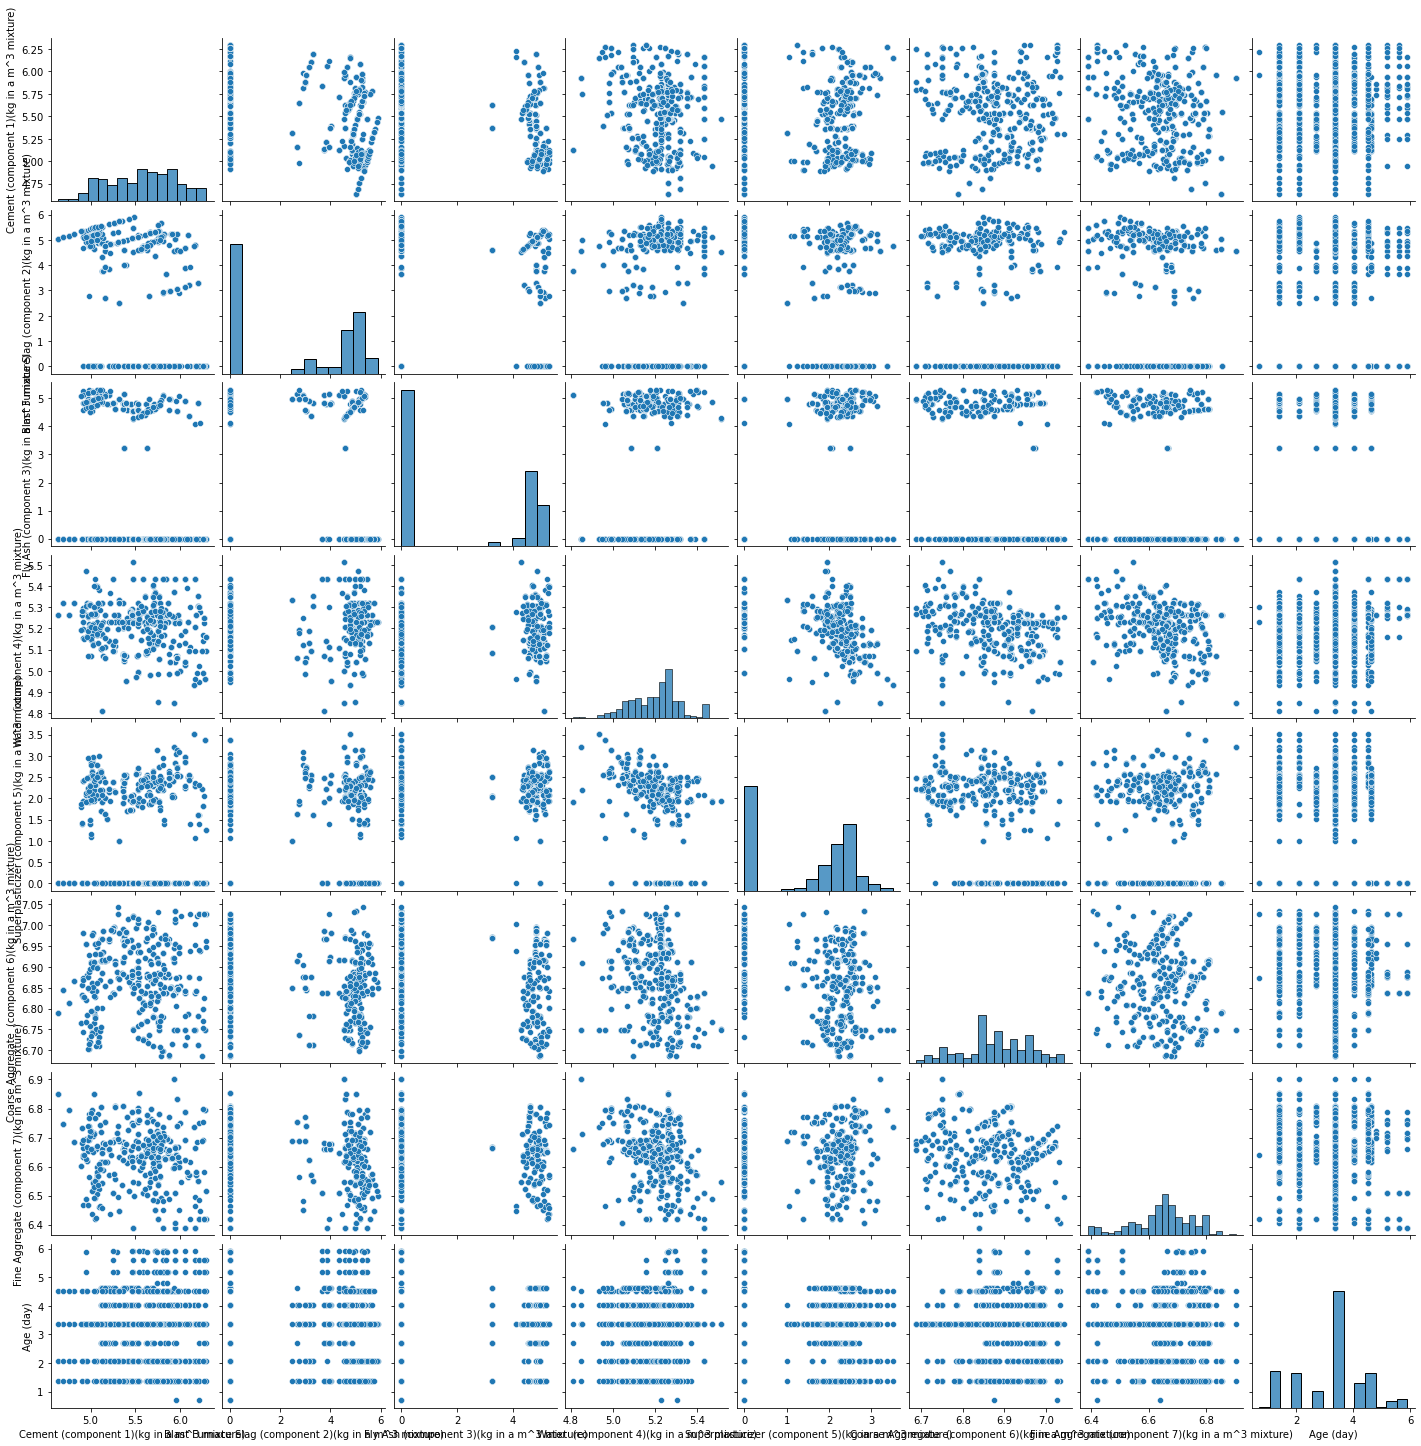

In [125]:
# We can also plot pairplot

sns.pairplot(data = independent_features_copy)

# 4) Outliers

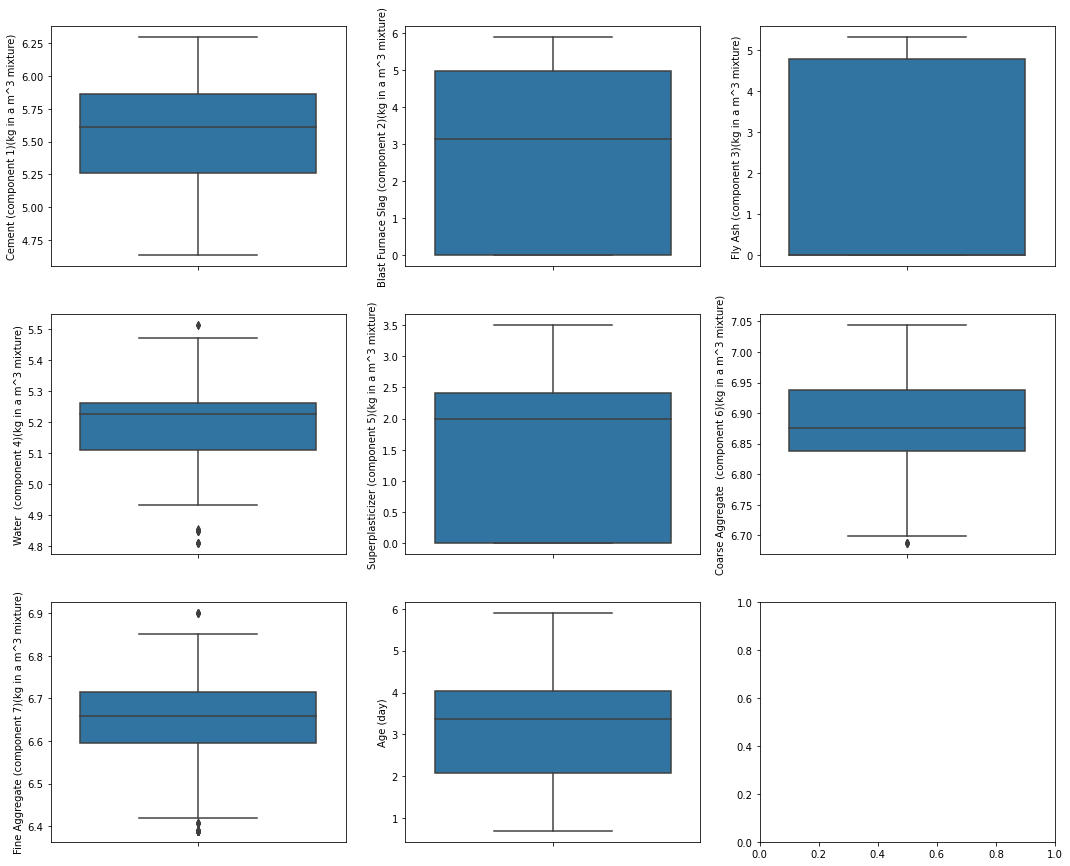

In [130]:
## Boxplot for finding outliers

fig, ax = plt.subplots(nrows= 3, ncols= 3, figsize = (18,15), facecolor = 'white')
ax = ax.ravel()
for i, col in enumerate(independent_features_copy.columns):
    sns.boxplot(y = independent_features_copy[col], ax=ax[i])

- From the above boxplots we can see that there are some outliers present in features - water, Coarse Aggregate, Fine Aggregate , rest looks fine.

In [131]:
def low_upp_fence(feature, constant =1.5):
    q1 = feature.quantile(0.25)
    q3 = feature.quantile(0.75)
    iqr = q3-q1
    lower_fence = q1 - iqr*constant
    upper_fence = q3 + iqr*constant
    return (lower_fence, upper_fence)

In [133]:
independent_features_copy.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,5.572436,2.553757,2.138371,5.200170,1.454741,6.878112,6.646786,3.242209
std,0.379392,2.411720,2.375088,0.118598,1.154941,0.080469,0.106263,1.110431
min,4.634729,0.000000,0.000000,4.810150,0.000000,6.687109,6.388561,0.693147
25%,5.264626,0.000000,0.000000,5.111385,0.000000,6.838405,6.595711,2.079442
50%,5.612763,3.135494,0.000000,5.225747,1.994700,6.876265,6.659948,3.367296
75%,5.860786,4.969466,4.781390,5.262690,2.412336,6.937702,6.715383,4.043051
max,6.293419,5.887215,5.303802,5.513429,3.502550,7.044033,6.901335,5.902633


- Finding outliers in features - water, Coarse Aggregate, Fine Aggregate

In [144]:
# Water

low, upp= low_upp_fence(independent_features_copy['Water  (component 4)(kg in a m^3 mixture)'])

In [145]:
low, upp

(4.88442770963367, 5.489647676467616)

In [146]:
len(independent_features_copy.loc[independent_features_copy['Water  (component 4)(kg in a m^3 mixture)'] < low]) + len(independent_features_copy.loc[independent_features_copy['Water  (component 4)(kg in a m^3 mixture)'] > upp]) 

14

In [148]:
# 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)'

low, upp = low_upp_fence(feature = independent_features_copy['Coarse Aggregate  (component 6)(kg in a m^3 mixture)'])
low, upp

(6.689459469093226, 7.086648087104209)

In [149]:
len(independent_features_copy.loc[independent_features_copy['Coarse Aggregate  (component 6)(kg in a m^3 mixture)'] < low]) + len(independent_features_copy.loc[independent_features_copy['Coarse Aggregate  (component 6)(kg in a m^3 mixture)'] > upp]) 

6

In [150]:
# 'Fine Aggregate (component 7)(kg in a m^3 mixture)'

low, upp = low_upp_fence(independent_features_copy['Fine Aggregate (component 7)(kg in a m^3 mixture)'])
low, upp

(6.416203319303039, 6.894891426553666)

In [152]:
len(independent_features_copy.loc[independent_features_copy['Fine Aggregate (component 7)(kg in a m^3 mixture)'] < low]) + len(independent_features_copy.loc[independent_features_copy['Fine Aggregate (component 7)(kg in a m^3 mixture)'] > upp])

40

- 14 in water, 6 in Coarse Aggregate and 40 in Fine Aggregate are outlier values.
- Since the proprtion is low we are not removing them

### Experiment : dropping outlier rows

In [175]:


exp_data = pd.concat([independent_features_copy.copy(), dep_features], axis = 1)

In [176]:
outlier_feat = ['Water  (component 4)(kg in a m^3 mixture)','Coarse Aggregate  (component 6)(kg in a m^3 mixture)','Fine Aggregate (component 7)(kg in a m^3 mixture)']

In [177]:
for feat in outlier_feat:
    low, upp = low_upp_fence(independent_features_copy[feat])
    exp_data = exp_data.loc[exp_data[feat] >= low].loc[exp_data[feat] <= upp]

In [178]:
exp_data.shape

(975, 9)

In [134]:
num_cols

['Cement (component 1)(kg in a m^3 mixture)',
 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
 'Fly Ash (component 3)(kg in a m^3 mixture)',
 'Water  (component 4)(kg in a m^3 mixture)',
 'Superplasticizer (component 5)(kg in a m^3 mixture)',
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
 'Age (day)',
 'Concrete compressive strength(MPa, megapascals) ']

# 5) Contribution of each feature 

In [153]:
import statsmodels.api as sm

In [154]:
independent_features_copy_constant = sm.add_constant(independent_features_copy)

In [156]:
independent_features_copy_constant

,const,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,1.0,6.293419,0.000000,0.000000,5.093750,1.252763,6.947937,6.517671,3.367296
1,1.0,6.293419,0.000000,0.000000,5.093750,1.252763,6.962243,6.517671,3.367296
2,1.0,5.809643,4.966335,0.000000,5.433722,0.000000,6.838405,6.388561,5.602119
3,1.0,5.809643,4.966335,0.000000,5.433722,0.000000,6.838405,6.388561,5.902633
4,1.0,5.296315,4.893352,0.000000,5.262690,0.000000,6.886940,6.717200,5.888878
...,...,...,...,...,...,...,...,...,...
1025,1.0,5.625461,4.762174,4.514151,5.196285,2.292535,6.769757,6.645481,3.367296
1026,1.0,5.778271,0.000000,4.758749,5.283204,2.433613,6.707962,6.702452,3.367296
1027,1.0,5.007296,4.944495,4.696837,5.266311,1.960095,6.795034,6.660575,3.367296
1028,1.0,5.075799,5.234845,0.000000,5.173887,2.509599,6.898311,6.671906,3.367296


In [166]:
model = sm.OLS(endog = dep_features, exog = independent_features_copy_constant).fit()

In [167]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                           
============================================================================================================
Dep. Variable:     Concrete compressive strength(MPa, megapascals)    R-squared:                       0.803
Model:                                                          OLS   Adj. R-squared:                  0.801
Method:                                               Least Squares   F-statistic:                     520.2
Date:                                              Sat, 14 May 2022   Prob (F-statistic):               0.00
Time:                                                      18:43:00   Log-Likelihood:                -3524.6
No. Observations:                                              1030   AIC:                             7067.
Df Residuals:                                                  1021   BIC:                             7112.
Df Model:                                                         8                                         
Covariance Type:                                          nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                   137.0184     71.601      1.914      0.056      -3.483     277.520
Cement (component 1)(kg in a m^3 mixture)                23.6982      0.996     23.785      0.000      21.743      25.653
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     2.2094      0.163     13.537      0.000       1.889       2.530
Fly Ash (component 3)(kg in a m^3 mixture)                0.2462      0.168      1.466      0.143      -0.083       0.576
Water  (component 4)(kg in a m^3 mixture)               -38.7721      3.821    -10.147      0.000     -46.270     -31.274
Superplasticizer (component 5)(kg in a m^3 mixture)       2.3079      0.382      6.042      0.000       1.558       3.057
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     -0.2908      4.653     -0.062      0.950      -9.422       8.841
Fine Aggregate (component 7)(kg in a m^3 mixture)       -10.2288      3.717     -2.752      0.006     -17.522      -2.936
Age (day)                                                 8.8911      0.213     41.790      0.000       8.474       9.309
==============================================================================
Omnibus:                       15.868   Durbin-Watson:                   1.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.428
Skew:                           0.138   Prob(JB):                     8.18e-06
Kurtosis:                       3.686   Cond. No.                     4.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

-------------------------------------------------------------------------------------------------------

####  OLS for exp_data (where outliers are removed)

In [179]:
exp_data_const = sm.add_constant(exp_data)

In [180]:
exp_data_const

,const,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,1.0,6.293419,0.000000,0.000000,5.093750,1.252763,6.947937,6.517671,3.367296,79.986111
1,1.0,6.293419,0.000000,0.000000,5.093750,1.252763,6.962243,6.517671,3.367296,61.887366
4,1.0,5.296315,4.893352,0.000000,5.262690,0.000000,6.886940,6.717200,5.888878,44.296075
5,1.0,5.587249,4.744932,0.000000,5.433722,0.000000,6.838405,6.508769,4.510860,47.029847
8,1.0,5.587249,4.744932,0.000000,5.433722,0.000000,6.838405,6.508769,3.367296,45.854291
...,...,...,...,...,...,...,...,...,...,...
1025,1.0,5.625461,4.762174,4.514151,5.196285,2.292535,6.769757,6.645481,3.367296,44.284354
1026,1.0,5.778271,0.000000,4.758749,5.283204,2.433613,6.707962,6.702452,3.367296,31.178794
1027,1.0,5.007296,4.944495,4.696837,5.266311,1.960095,6.795034,6.660575,3.367296,23.696601
1028,1.0,5.075799,5.234845,0.000000,5.173887,2.509599,6.898311,6.671906,3.367296,32.768036


In [181]:
outlier_model = sm.OLS(endog = exp_data['Concrete compressive strength(MPa, megapascals) '], exog= exp_data_const.drop(['Concrete compressive strength(MPa, megapascals) '], axis = 1)).fit()

In [182]:
outlier_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                           
============================================================================================================
Dep. Variable:     Concrete compressive strength(MPa, megapascals)    R-squared:                       0.837
Model:                                                          OLS   Adj. R-squared:                  0.836
Method:                                               Least Squares   F-statistic:                     620.8
Date:                                              Sat, 14 May 2022   Prob (F-statistic):               0.00
Time:                                                      18:49:03   Log-Likelihood:                -3260.7
No. Observations:                                               975   AIC:                             6539.
Df Residuals:                                                   966   BIC:                             6583.
Df Model:                                                         8                                         
Covariance Type:                                          nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                   409.5315     71.852      5.700      0.000     268.528     550.535
Cement (component 1)(kg in a m^3 mixture)                22.4408      0.947     23.706      0.000      20.583      24.298
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     2.0915      0.157     13.347      0.000       1.784       2.399
Fly Ash (component 3)(kg in a m^3 mixture)                0.1518      0.159      0.953      0.341      -0.161       0.464
Water  (component 4)(kg in a m^3 mixture)               -54.9045      3.975    -13.812      0.000     -62.705     -47.103
Superplasticizer (component 5)(kg in a m^3 mixture)       1.4041      0.372      3.776      0.000       0.674       2.134
Coarse Aggregate  (component 6)(kg in a m^3 mixture)    -12.1148      4.606     -2.630      0.009     -21.153      -3.076
Fine Aggregate (component 7)(kg in a m^3 mixture)       -25.2492      3.740     -6.752      0.000     -32.588     -17.910
Age (day)                                                 9.5075      0.205     46.275      0.000       9.104       9.911
==============================================================================
Omnibus:                       11.782   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.274
Skew:                           0.145   Prob(JB):                     0.000482
Kurtosis:                       3.541   Cond. No.                     4.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### As we can see that after removing the outlier rows Adjusted R^2 value raised by 2 percent.

## Checking for VIF (Variation Inflation Factor)

- Need to Standardize the data before applying variance_inflation_factor

In [191]:
scaler = StandardScaler()
exp_data_scaled = scaler.fit_transform(exp_data)

In [192]:
exp_data_scaled.shape[1]

9

In [183]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [193]:
ivf =[variance_inflation_factor(exp_data_scaled, i) for i in range(exp_data_scaled.shape[1])]

In [194]:
ivf

[4.1686490685668245,
 3.4959249802889034,
 2.9515651778243925,
 4.321982542673043,
 3.772300363353206,
 2.752068953619294,
 2.7504645401799412,
 3.2889822358905967,
 6.141224761846828]

In [195]:
# Adding feature names

vif_df = pd.concat([pd.Series(exp_data.columns, name = 'Features'), pd.Series(ivf, name = 'VIF')], axis = 1)

In [196]:
vif_df

,Features,VIF
0,Cement (component 1)(kg in a m^3 mixture),4.168649
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,3.495925
2,Fly Ash (component 3)(kg in a m^3 mixture),2.951565
3,Water (component 4)(kg in a m^3 mixture),4.321983
4,Superplasticizer (component 5)(kg in a m^3 mix...,3.772300
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,2.752069
6,Fine Aggregate (component 7)(kg in a m^3 mixture),2.750465
7,Age (day),3.288982
8,"Concrete compressive strength(MPa, megapascals)",6.141225


Generally the threshold VIF is considered to be 5, anything above it can be dropped, as it hints severe multi collinearity in data.

- Summing up, we need to convert the data into log normal form and handle outlier, then standardize data. 
- According to statistics, OLS model is able to satisfy around 83% of goven sampled data.